<div style="background-color:#d9f1ff; padding:20px; border-radius:10px; text-align:center; font-size:20px; font-weight:bold; border:1px solid #b3e0ff;">
  SMART CCTV SURVEILLANCE WITH MOTION BASED VIDEO TRIMMING AND OBJECT DETECTION IN INTRUSION ZONES
</div>


In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

### Viewing From Images

In [3]:
imPath=r'C:\Users\ARJUN\Desktop\CV PROJECT\Data\RailwayTrack\RawImages'
for imName in os.listdir(imPath):
        frame = cv2.imread(os.path.join(imPath,imName))
        frame = cv2.resize(frame,dsize=(600,400))
        cv2.imshow('Display',frame)
        k = cv2.waitKey(30) & 0xff
        if k == 27:
            break
cv2.destroyAllWindows()


In [5]:
imPath=r'C:\Users\ARJUN\Desktop\CV PROJECT\Data\Trees'
for imName in os.listdir(imPath):
        frame = cv2.imread(os.path.join(imPath,imName))
        frame = cv2.resize(frame,dsize=(600,400))
        cv2.imshow('Display',frame)
        k = cv2.waitKey(30) & 0xff
        if k == 27:
            break
cv2.destroyAllWindows()


In [7]:
imPath=r'C:\Users\ARJUN\Desktop\CV PROJECT\Data\ShoppingMall'
for imName in os.listdir(imPath):
        frame = cv2.imread(os.path.join(imPath,imName))
        frame = cv2.resize(frame,dsize=(600,400))
        cv2.imshow('Display',frame)
        k = cv2.waitKey(30) & 0xff
        if k == 27:
            break
cv2.destroyAllWindows()

## Viewing From Video

In [11]:
vidPath=r'C:\Users\ARJUN\Desktop\CV PROJECT\Data\sroom4.avi'
cap = cv2.VideoCapture(vidPath)
while(1):
    ret, frame = cap.read()
    frame = cv2.resize(frame,dsize=(600,400))
    cv2.imshow('Display',frame)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()


In [15]:
#TAKE ANY CCT VIDEO AND PUT IT AS DATASET 1.mp4
vidPath=r'C:\Users\ARJUN\Desktop\CV PROJECT\Data\DATASET 1.mp4'
cap = cv2.VideoCapture(vidPath)
while(1):
    ret, frame = cap.read()
    frame = cv2.resize(frame,dsize=(600,400))
    cv2.imshow('Display',frame)
    k = cv2.waitKey(1) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

### CHANGE DETECTION USING <b>FRAME DIFFERENCING</B>


In [17]:
B=cv2.imread(r'C:\Users\ARJUN\Desktop\CV PROJECT\Data\RailwayTrack\B.bmp')
I=cv2.imread(r'C:\Users\ARJUN\Desktop\CV PROJECT\Data\RailwayTrack\I.bmp')

Text(0.5, 1.0, 'Object Image(I)')

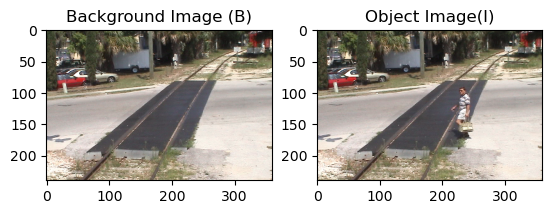

In [19]:
plt.subplot(121)
plt.title("Background Image (B)")
plt.imshow(B[:,:,::-1])
plt.subplot(122)
plt.imshow(I[:,:,::-1])
plt.title("Object Image(I)")


In [26]:
B = np.float32(B)
I = np.float32(I)

In [28]:
C = (I-B)**2
C.shape

(240, 360, 3)

In [30]:
C2 = np.sum(C,axis=2)
C2.shape

(240, 360)

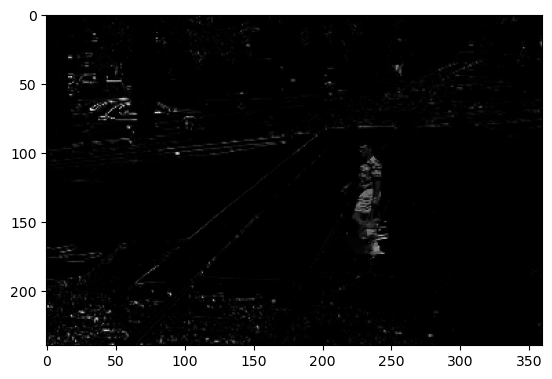

In [30]:
plt.imshow(C2,cmap='gray')

In [34]:
C2.max(),C2.mean()



(189017.0, 2068.9297)

### THRESHOLDING

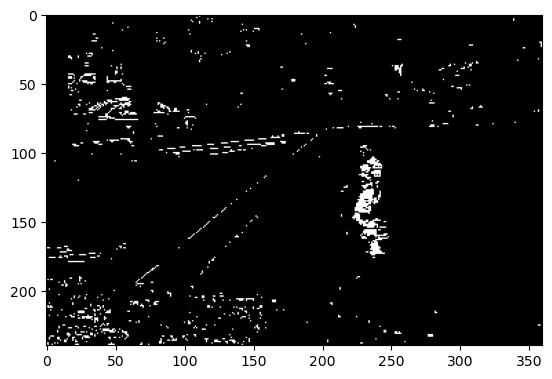

In [37]:
plt.imshow(C2>C2.mean()+2*C2.std(),cmap='gray')

### CHANGE DETECTION USING <B>BACKGROUND SUBSTRACTION - MIXTURE OF GAUSSIAN(MOG) </B>

In [74]:
imPath=r'C:\Users\ARJUN\Desktop\CV PROJECT\Data\RailwayTrack\RawImages'
fgModel = cv2.createBackgroundSubtractorMOG2()
for imName in os.listdir(imPath):
    frame = cv2.imread(os.path.join(imPath,imName))
    frame = cv2.resize(frame,dsize=(600,400))
    fgmask = fgModel.apply(frame)
    F = np.zeros(frame.shape,np.uint8)
    F[:,:,0],F[:,:,1],F[:,:,2] = fgmask, fgmask,fgmask
    F2 = np.hstack((frame,F))
    cv2.imshow('Display',F2)
    k = cv2.waitKey(5) & 0xff
    if k == 27:
        break
cv2.destroyAllWindows()


In [11]:
imPath=r'C:\Users\ARJUN\Desktop\CV PROJECT\Data\ShoppingMall'
fgModel = cv2.createBackgroundSubtractorMOG2()
for imName in os.listdir(imPath):
    frame = cv2.imread(os.path.join(imPath,imName))
    frame = cv2.resize(frame,dsize=(600,400))
    fgmask = fgModel.apply(frame)
    F = np.zeros(frame.shape,np.uint8)
    F[:,:,0],F[:,:,1],F[:,:,2] = fgmask, fgmask,fgmask
    F2 = np.hstack((frame,F))
    cv2.imshow('Display',F2)
    k = cv2.waitKey(5) & 0xff
    if k == 27:
        break
cv2.destroyAllWindows()


### DENOISING USING <B>MORPHOLOGY</B>

In [76]:
imPath=r'C:\Users\ARJUN\Desktop\CV PROJECT\Data\RailwayTrac\RawImages'
fgModel = cv2.createBackgroundSubtractorMOG2()
for imName in os.listdir(imPath):
    frame = cv2.imread(os.path.join(imPath,imName))
    frame = cv2.resize(frame,dsize=(600,400))
    fgmask = fgModel.apply(frame)
    K_r = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    fgmask = cv2.morphologyEx(np.float32(fgmask),cv2.MORPH_OPEN,K_r)
    F = np.zeros(frame.shape,np.uint8)
    F[:,:,0],F[:,:,1],F[:,:,2] = fgmask, fgmask,fgmask
    F2 = np.hstack((frame,F))
    cv2.imshow('Display',F2)
    k = cv2.waitKey(5) & 0xff
    if k == 27:
        break
cv2.destroyAllWindows()


In [11]:
imPath=r'C:\Users\ARJUN\Desktop\CV PROJECT\Data\ShoppingMall'
fgModel = cv2.createBackgroundSubtractorMOG2()
for imName in os.listdir(imPath):
    frame = cv2.imread(os.path.join(imPath,imName))
    frame = cv2.resize(frame,dsize=(600,400))
    fgmask = fgModel.apply(frame)
    K_r = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    fgmask = cv2.morphologyEx(np.float32(fgmask),cv2.MORPH_OPEN,K_r)
    F = np.zeros(frame.shape,np.uint8)
    F[:,:,0],F[:,:,1],F[:,:,2] = fgmask, fgmask,fgmask
    F2 = np.hstack((frame,F))
    cv2.imshow('Display',F2)
    k = cv2.waitKey(5) & 0xff
    if k == 27:
        break
cv2.destroyAllWindows()


In [78]:
imPath=r'C:\Users\ARJUN\Desktop\CV PROJECT\Data\Trees'
fgModel = cv2.createBackgroundSubtractorMOG2()
for imName in os.listdir(imPath):
    frame = cv2.imread(os.path.join(imPath,imName))
    frame = cv2.resize(frame,dsize=(600,400))
    fgmask = fgModel.apply(frame)
    K_r = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    fgmask = cv2.morphologyEx(np.float32(fgmask),cv2.MORPH_OPEN,K_r)
    F = np.zeros(frame.shape,np.uint8)
    F[:,:,0],F[:,:,1],F[:,:,2] = fgmask, fgmask,fgmask
    F2 = np.hstack((frame,F))
    cv2.imshow('Display',F2)
    k = cv2.waitKey(5) & 0xff
    if k == 27:
        break
cv2.destroyAllWindows()

### CONNECTED COMPONENTS

In [80]:
def f_keepLargeComponents(I,th):
    R = np.zeros(I.shape)<0
    unique_labels = np.unique(I.flatten())
    for label in unique_labels:
        if label == 0:
            pass
        else:
            I2 = I==label
            if np.sum(I2)>th:
                R = R | I2
    return np.float32(255*R)

In [82]:
imPath=r'C:\Users\ARJUN\Desktop\CV PROJECT\Data\Trees'
fgModel = cv2.createBackgroundSubtractorMOG2()
for imName in os.listdir(imPath):
    frame = cv2.imread(os.path.join(imPath,imName))
    frame = cv2.resize(frame,dsize=(600,400))
    fgmask = fgModel.apply(frame)
    K_r = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    fgmask = cv2.morphologyEx(np.float32(fgmask),cv2.MORPH_OPEN,K_r)
    num_labels,labels_im = cv2.connectedComponents(np.array(fgmask>0,np.uint8))
    fgmask = f_keepLargeComponents(labels_im,1000)
    F = np.zeros(frame.shape,np.uint8)
    F[:,:,0],F[:,:,1],F[:,:,2] = fgmask, fgmask,fgmask
    F2 = np.hstack((frame,F))
    cv2.imshow('Display',F2)
    k = cv2.waitKey(5) & 0xff
    if k == 27:
        break
cv2.destroyAllWindows()


In [65]:
imPath=r'C:\Users\ARJUN\Desktop\CV PROJECT\Data\RailwayTrack\RawImages'
fgModel = cv2.createBackgroundSubtractorMOG2()
for imName in os.listdir(imPath):
    frame = cv2.imread(os.path.join(imPath,imName))
    frame = cv2.resize(frame,dsize=(600,400))
    fgmask = fgModel.apply(frame)
    K_r = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    fgmask = cv2.morphologyEx(np.float32(fgmask),cv2.MORPH_OPEN,K_r)
    num_labels,labels_im = cv2.connectedComponents(np.array(fgmask>0,np.uint8))
    fgmask = f_keepLargeComponents(labels_im,1000)
    F = np.zeros(frame.shape,np.uint8)
    F[:,:,0],F[:,:,1],F[:,:,2] = fgmask, fgmask,fgmask
    F2 = np.hstack((frame,F))
    cv2.imshow('Display',F2)
    k = cv2.waitKey(5) & 0xff
    if k == 27:
        break
cv2.destroyAllWindows()


### TRACKING MOTION-TRIMMING AND SAVING

In [86]:
import cvlib as cv
from cvlib.object_detection import draw_bbox
def f_saveSeq(C,counter,th,outPutPath):
    if len(C)<th:
        pass
    else:
        k = 1
        for frame in C:
            imName = str(counter)+'_'+ str(k)+'.jpg'
            finalPath = os.path.join(outPutPath,imName)
            cv2.imwrite(finalPath,frame)
            k += 1

In [90]:
imPath=r'C:\Users\ARJUN\Desktop\CV PROJECT\Data\RailwayTrac\RawImages'
fgModel = cv2.createBackgroundSubtractorMOG2()
leastNumOfFrames = 5
idx = []
C = []
counter = 0
outPutPath=r'C:\Users\ARJUN\Desktop\CV PROJECT\Data\tracked_trimmed'
for imName in os.listdir(imPath):
    counter += 1
    frame = cv2.imread(os.path.join(imPath,imName))
    frame = cv2.resize(frame,dsize=(600,400))
    fgmask = fgModel.apply(frame)
    K_r = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    fgmask = cv2.morphologyEx(np.float32(fgmask),cv2.MORPH_OPEN,K_r)
    num_labels,labels_im = cv2.connectedComponents(np.array(fgmask>0,np.uint8))
    fgmask = f_keepLargeComponents(labels_im,1000)
    if np.sum(fgmask)>0:
        idx.append(counter)
        C.append(frame)
    if len(idx) >= 2 and idx[-1] > idx[-2]+1:
        f_saveSeq(C,counter,leastNumOfFrames,outPutPath)
        idx = []
        C = []
    F = np.zeros(frame.shape,np.uint8)
    F[:,:,0],F[:,:,1],F[:,:,2] = fgmask, fgmask,fgmask
    F2 = np.hstack((frame,F))
    cv2.imshow('Display',F2)
    k = cv2.waitKey(5) & 0xff
    if k == 27:
        break
f_saveSeq(C,counter,leastNumOfFrames,outPutPath)
cv2.destroyAllWindows()

### Viewing

In [92]:
import cv2
import os
import re

folder = r'C:\Users\ARJUN\Desktop\CV PROJECT\Data\tracked_trimmed'
images = [img for img in os.listdir(folder) if img.endswith('.jpg')]
images.sort(key=lambda x: [int(t) if t.isdigit() else t for t in re.split('(\d+)', x)])

for image in images:
    img_path = os.path.join(folder, image)
    frame = cv2.imread(img_path)
    if frame is None:
        continue
    cv2.imshow("Fast Video", frame)
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()


<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ARJUN\AppData\Local\Temp\ipykernel_22484\3331185662.py:7: SyntaxWarning: invalid escape sequence '\d'
  images.sort(key=lambda x: [int(t) if t.isdigit() else t for t in re.split('(\d+)', x)])


## Trimmed+Object Detection using YoloV3

In [27]:
import os
import cv2
import numpy as np

def load_yolo_model(cfg_path, weights_path, names_path):
    net = cv2.dnn.readNetFromDarknet(cfg_path, weights_path)
    net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
    net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

    with open(names_path, 'r') as f:
        classes = f.read().strip().split('\n')
    
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
    
    return net, classes, output_layers

def detect_objects(frame, net, output_layers, classes):
    height, width = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1/255.0, (416,416), swapRB=True, crop=False)
    net.setInput(blob)
    outputs = net.forward(output_layers)

    boxes, confidences, class_ids = [], [], []
    conf_threshold = 0.5
    nms_threshold = 0.4

    for out in outputs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > conf_threshold:
                center_x = int(detection[0]*width)
                center_y = int(detection[1]*height)
                w = int(detection[2]*width)
                h = int(detection[3]*height)
                x = int(center_x - w/2)
                y = int(center_y - h/2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
    results = []
    for i in indices:
        i = i[0] if isinstance(i, (list, tuple, np.ndarray)) else i
        box = boxes[i]
        label = classes[class_ids[i]]
        confidence = confidences[i]
        results.append((box, label, confidence))
    
    return results

def draw_boxes(frame, detections):
    for (box, label, confidence) in detections:
        x, y, w, h = box
        color = (0, 255, 0)
        cv2.rectangle(frame, (x,y), (x+w, y+h), color, 2)
        text = f"{label}: {confidence:.2f}"
        cv2.putText(frame, text, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    return frame

def f_saveSeq(C, counter, th, outPutPath):
    if len(C) < th:
        return

    # Set YOLO file paths
    yolo_cfg = r'C:\Users\ARJUN\Desktop\CV PROJECT\yolo_model\yolov3.cfg'
    yolo_weights = r'C:\Users\ARJUN\Desktop\CV PROJECT\yolo_model\yolov3.weights'
    labels_path = r'C:\Users\ARJUN\Desktop\CV PROJECT\yolo_model\coco.names'

    net, classes, output_layers = load_yolo_model(yolo_cfg, yolo_weights, labels_path)

    k = 1
    for frame in C:
        detections = detect_objects(frame, net, output_layers, classes)
        frame = draw_boxes(frame, detections)
        imName = str(counter) + '_' + str(k) + '.jpg'
        finalPath = os.path.join(outPutPath, imName)
        cv2.imwrite(finalPath, frame)
        k += 1


In [29]:
imPath=r'C:\Users\ARJUN\Desktop\CV PROJECT\Data\GroundtruthSeq\RawImages'
fgModel = cv2.createBackgroundSubtractorMOG2()
leastNumOfFrames = 5
idx = []
C = []
counter = 0
outPutPath=r'C:\Users\ARJUN\Desktop\CV PROJECT\Data\tracked'
for imName in os.listdir(imPath):
    counter += 1
    frame = cv2.imread(os.path.join(imPath,imName))
    frame = cv2.resize(frame,dsize=(600,400))
    fgmask = fgModel.apply(frame)
    K_r = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    fgmask = cv2.morphologyEx(np.float32(fgmask),cv2.MORPH_OPEN,K_r)
    num_labels,labels_im = cv2.connectedComponents(np.array(fgmask>0,np.uint8))
    fgmask = f_keepLargeComponents(labels_im,1000)
    if np.sum(fgmask)>0:
        idx.append(counter)
        C.append(frame)
    if len(idx) >= 2 and idx[-1] > idx[-2]+1:
        f_saveSeq(C,counter,leastNumOfFrames,outPutPath)
        idx = []
        C = []
    F = np.zeros(frame.shape,np.uint8)
    F[:,:,0],F[:,:,1],F[:,:,2] = fgmask, fgmask,fgmask
    F2 = np.hstack((frame,F))
    cv2.imshow('Display',F2)
    k = cv2.waitKey(5) & 0xff
    if k == 27:
        break
f_saveSeq(C,counter,leastNumOfFrames,outPutPath)
cv2.destroyAllWindows()

## Viewing

In [13]:
def f_displaySeq(outPutPath):
    for imName in os.listdir(outPutPath):
        frame = cv2.imread(os.path.join(outPutPath,imName))
        frame = cv2.resize(frame,dsize=(600,400))
        cv2.imshow('Display',frame)
        k = cv2.waitKey(30) & 0xff
        if k == 27:
            break
    cv2.destroyAllWindows()

In [17]:
pth = r'C:\Users\ARJUN\Desktop\CV PROJECT\Data\tracked_new'
f_displaySeq(pth)

## Trimmed+Object Detection using YoloV8

In [48]:
import os
import cv2
import numpy as np
from ultralytics import YOLO

# Function to filter out small blobs
def f_keepLargeComponents(labels_im, min_size):
    mask = np.zeros(labels_im.shape, dtype=np.uint8)
    for label in np.unique(labels_im):
        if label == 0:
            continue
        component = (labels_im == label).astype(np.uint8)
        if cv2.countNonZero(component) >= min_size:
            mask = cv2.bitwise_or(mask, component)
    return mask

# Save frames with bounding boxes
def f_saveSeq(C, counter, th, outPutPath, model):
    if len(C) < th:
        return
    os.makedirs(outPutPath, exist_ok=True)
    k = 1
    for frame in C:
        imName = f"{counter}_{k}.jpg"
        finalPath = os.path.join(outPutPath, imName)
        
        results = model(frame)
        annotated = results[0].plot()
        cv2.imwrite(finalPath, annotated)
        k += 1

# Paths
imPath = r'C:\Users\ARJUN\Desktop\CV PROJECT\Data\RailwayTrack\RawImages'
outPutPath = r'C:\Users\ARJUN\Desktop\CV PROJECT\Data\tracked_trimmed_object'

# Model
model = YOLO("yolov8n.pt")  # You can use yolov8s.pt or yolov8m.pt for better accuracy

# Background subtractor
fgModel = cv2.createBackgroundSubtractorMOG2()
leastNumOfFrames = 5
idx = []
C = []
counter = 0

# Loop over images
for imName in sorted(os.listdir(imPath)):
    counter += 1
    frame_path = os.path.join(imPath, imName)
    frame = cv2.imread(frame_path)
    frame = cv2.resize(frame, dsize=(600, 400))

    fgmask = fgModel.apply(frame)
    K_r = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, K_r)
    num_labels, labels_im = cv2.connectedComponents((fgmask > 0).astype(np.uint8))
    fgmask = f_keepLargeComponents(labels_im, 1000)

    if np.sum(fgmask) > 0:
        idx.append(counter)
        C.append(frame)

    if len(idx) >= 2 and idx[-1] > idx[-2] + 1:
        f_saveSeq(C, counter, leastNumOfFrames, outPutPath, model)
        idx = []
        C = []

    # Visual display
    F = np.zeros_like(frame)
    F[:, :, 0] = fgmask
    F[:, :, 1] = fgmask
    F[:, :, 2] = fgmask
    F2 = np.hstack((frame, F))
    cv2.imshow('Display', F2)
    k = cv2.waitKey(5) & 0xff
    if k == 27:
        break

f_saveSeq(C, counter, leastNumOfFrames, outPutPath, model)
cv2.destroyAllWindows()


C:\Users\ARJUN\anaconda3\envs\myenv\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(



0: 448x640 3 cars, 153.4ms
Speed: 7.1ms preprocess, 153.4ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 person, 2 cars, 122.0ms
Speed: 3.7ms preprocess, 122.0ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 person, 5 cars, 118.3ms
Speed: 2.9ms preprocess, 118.3ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 person, 4 cars, 108.4ms
Speed: 2.7ms preprocess, 108.4ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 person, 3 cars, 89.2ms
Speed: 2.3ms preprocess, 89.2ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 person, 3 cars, 83.1ms
Speed: 2.0ms preprocess, 83.1ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 person, 4 cars, 78.0ms
Speed: 2.1ms preprocess, 78.0ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 3 persons, 3 cars, 1 truck, 77.1ms
Speed: 1.9ms prep

### Viewing

In [55]:
import cv2
import os
import re

folder = r'C:\Users\ARJUN\Desktop\CV PROJECT\Data\tracked_trimmed_object'
images = [img for img in os.listdir(folder) if img.endswith('.jpg')]
images.sort(key=lambda x: [int(t) if t.isdigit() else t for t in re.split('(\d+)', x)])

for image in images:
    img_path = os.path.join(folder, image)
    frame = cv2.imread(img_path)
    if frame is None:
        continue
    cv2.imshow("Fast Video", frame)
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
